### Importing the dependecies

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

### Data Collection

In [3]:
# loading the daatset into pd dataframe
wine_dataset = pd.read_csv("winequality-red.csv")

# number of rows and columns in the dataset
wine_dataset.shape

# first 5 rows of the dataset
wine_dataset.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# checking for missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Data Analysis and visualization

In [5]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


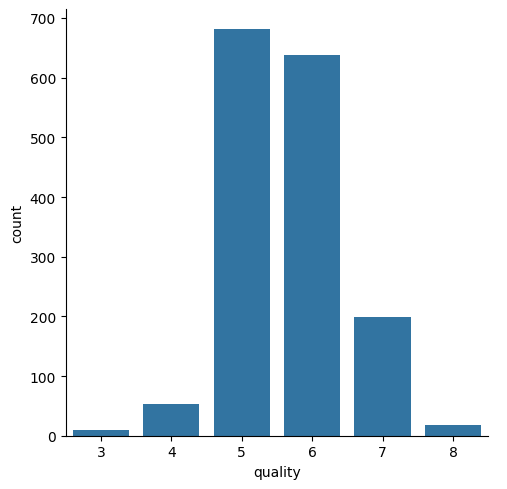

In [6]:
# number of values each quality
sns.catplot(x="quality", data=wine_dataset, kind="count")

<Axes: xlabel='quality', ylabel='volatile acidity'>

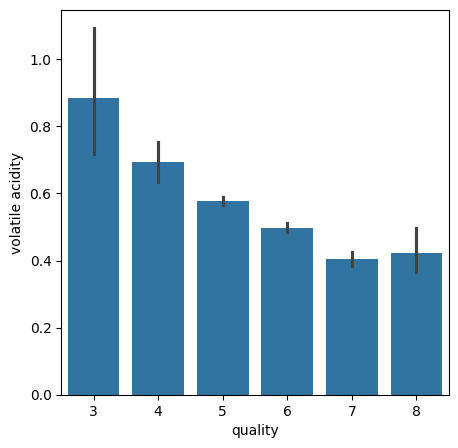

In [7]:
# volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x="quality", y="volatile acidity", data=wine_dataset)

### Correlation 

#### Postive Correlation and negative Correlation

In [8]:
correlation = wine_dataset.corr()

<Axes: >

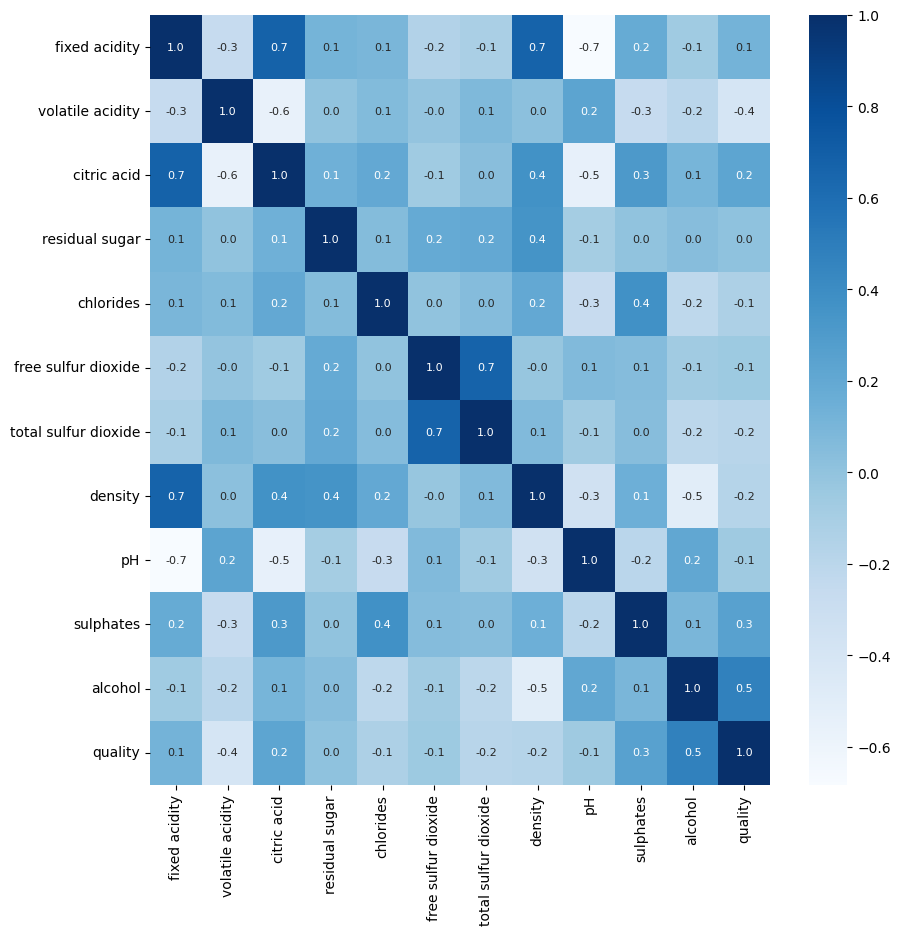

In [9]:
# constructing a heatmap to understand to understand the correlation between the columns
plt.figure(figsize=(10, 10))
sns.heatmap(
    correlation, cbar=True, annot=True, annot_kws={"size": 8}, fmt=".1f", cmap="Blues"
)

### Data preprocessing

In [10]:
# sepatre the data and label
X = wine_dataset.drop("quality", axis=1)

#### label Binarization

In [11]:
# sepatre the data and label
Y = wine_dataset["quality"].apply(lambda y_value: 1 if y_value >= 7 else 0)

print(Y)
Y.value_counts()

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


quality
0    1382
1     217
Name: count, dtype: int64

#### Train Test split

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

print(X.shape, X_train.shape, X_test.shape)

(1599, 11) (1279, 11) (320, 11)


### Model training 

In [13]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Model Evalution

#### Accuracy on test data 

In [14]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print(test_data_accuracy) 


0.9375


### Building a predictive system 

In [15]:
input_data = (7.5, 0.5, 0.36, 6.1, 0.071, 17.0, 102.0, 0.9978, 3.35, 0.8, 10.5)

# changint the inpurt daat into numpy array

input_data_as_numpy_array = np.array(input_data)

# reshape the data as we are predicting the label for only one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)

if(prediction[0] == 0):
    print("The quality of the wine is bad")
else:
    print("The quality of the wine is good")

The quality of the wine is bad


c:\Users\navee\project6_ml\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
